# Analyze machine learning compressed input data

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [30]:
df = pd.read_table("./data/testDataShort.txt")

In [31]:
#see how many rows and columns
df.shape 

(622, 10)

In [32]:
#see the first 5 rows
df.head(5) 

,R,1,2,3,4,5,6,7,8,9
0,0,909,991,1007,976,971,973,976,969,12
1,0,903,987,1003,970,975,976,980,974,35
2,0,909,993,1008,976,976,977,980,974,27
3,0,910,992,1010,977,972,973,977,970,19
4,0,910,991,1007,975,974,975,980,974,20


In [33]:
#see the last 5 rows
df.tail(5)

,R,1,2,3,4,5,6,7,8,9
617,3,917,972,991,978,1005,993,990,983,8
618,3,916,972,990,977,1004,993,991,981,11
619,3,916,970,989,976,1004,992,989,981,15
620,3,916,969,990,976,1004,992,989,980,5
621,3,915,971,990,978,1011,1003,994,985,32


In [34]:
#check that values are not null
df.isnull().values.any()

False

In [35]:
#plot correlation method using matplotlib.pyplot
def plot_corr(df, size = 11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

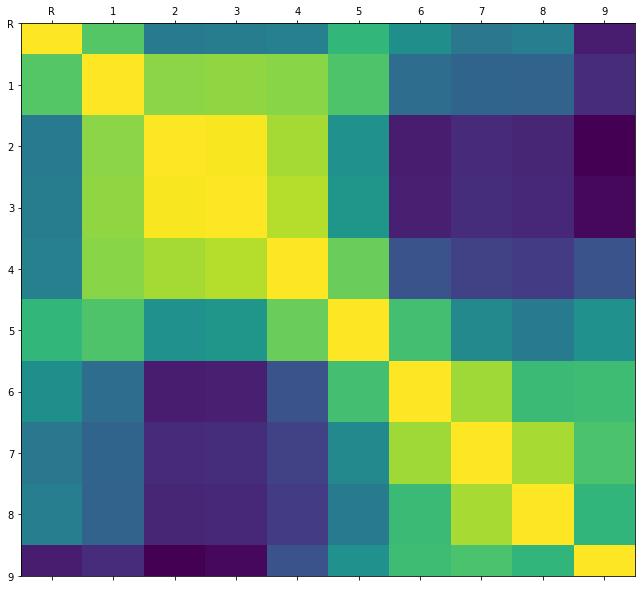

In [36]:
plot_corr(df)

In [37]:
df.corr()

,R,1,2,3,4,5,6,7,8,9
R,1.000000,0.689591,0.300223,0.314549,0.332280,0.601005,0.405487,0.286134,0.322272,-0.090375
1,0.689591,1.000000,0.793208,0.803461,0.789428,0.673933,0.240767,0.199612,0.192780,-0.029988
2,0.300223,0.793208,1.000000,0.986448,0.840449,0.415004,-0.088047,-0.037673,-0.055689,-0.181472
3,0.314549,0.803461,0.986448,1.000000,0.869206,0.444557,-0.078187,-0.025830,-0.047026,-0.157081
4,0.332280,0.789428,0.840449,0.869206,1.000000,0.729508,0.119639,0.046665,0.025365,0.120612
5,0.601005,0.673933,0.415004,0.444557,0.729508,1.000000,0.644904,0.375143,0.303419,0.416067
6,0.405487,0.240767,-0.088047,-0.078187,0.119639,0.644904,1.000000,0.829596,0.623864,0.631481
7,0.286134,0.199612,-0.037673,-0.025830,0.046665,0.375143,0.829596,1.000000,0.847687,0.663623
8,0.322272,0.192780,-0.055689,-0.047026,0.025365,0.303419,0.623864,0.847687,1.000000,0.596355
9,-0.090375,-0.029988,-0.181472,-0.157081,0.120612,0.416067,0.631481,0.663623,0.596355,1.000000


In [38]:
r_empty = len(df.loc[df['R'] == 0])
r_move = len(df.loc[df['R'] == 1])
r_tv = len(df.loc[df['R'] == 2])
r_sleep = len(df.loc[df['R'] == 3])
r_fall = len(df.loc[df['R'] == 4])
print("Empty {0}, Moving {1}, TV {2}, Sleep 3 {3}, Fall 4 {4}".format(r_empty, r_move, r_tv, r_sleep, r_fall))

Empty 201, Moving 36, TV 206, Sleep 3 179, Fall 4 0


In [40]:
from sklearn.model_selection import train_test_split

feature_col_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
predicted_class_names = ['R']

X = df[feature_col_names].values     
y = df[predicted_class_names].values 
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [82]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.86% in training set
30.14% in test set


In [83]:
print("Original Empty:\t {0} ({1:0.2f}%)".format(len(df.loc[df['R'] == 0]), (len(df.loc[df['R'] == 0])/len(df) * 100.0)))
print("Original Move:\t {0} ({1:0.2f}%)".format(len(df.loc[df['R'] == 1]), (len(df.loc[df['R'] == 1])/len(df) * 100.0)))
print("Original TV:\t {0} ({1:0.2f}%)".format(len(df.loc[df['R'] == 2]), (len(df.loc[df['R'] == 2])/len(df) * 100.0)))
print("Original Sleep:\t {0} ({1:0.2f}%)".format(len(df.loc[df['R'] == 3]), (len(df.loc[df['R'] == 3])/len(df) * 100.0)))
print("Original Fall:\t {0} ({1:0.2f}%)".format(len(df.loc[df['R'] == 4]), (len(df.loc[df['R'] == 4])/len(df) * 100.0)))

Original Empty:	 118 (20.56%)
Original Move:	 142 (24.74%)
Original TV:	 108 (18.82%)
Original Sleep:	 157 (27.35%)
Original Fall:	 49 (8.54%)


In [84]:
print("Training Empty:\t {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("Training Move:\t {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training TV:\t {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 2]), (len(y_train[y_train[:] == 2])/len(y_train) * 100.0)))
print("Training Sleep:\t {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 3]), (len(y_train[y_train[:] == 3])/len(y_train) * 100.0)))
print("Training Fall:\t {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 4]), (len(y_train[y_train[:] == 4])/len(y_train) * 100.0)))

Training Empty:	 75 (18.70%)
Training Move:	 99 (24.69%)
Training TV:	 81 (20.20%)
Training Sleep:	 114 (28.43%)
Training Fall:	 32 (7.98%)


In [85]:
print("Test Empty:\t {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))
print("Test Move:\t {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test TV:\t {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 2]), (len(y_test[y_test[:] == 2])/len(y_test) * 100.0)))
print("Test Sleep:\t {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 3]), (len(y_test[y_test[:] == 3])/len(y_test) * 100.0)))
print("Test Fall:\t {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 4]), (len(y_test[y_test[:] == 4])/len(y_test) * 100.0)))

Test Empty:	 43 (24.86%)
Test Move:	 43 (24.86%)
Test TV:	 27 (15.61%)
Test Sleep:	 43 (24.86%)
Test Fall:	 17 (9.83%)


In [86]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy="mean")#, axis=0)
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)


In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

nb_predict_train = nb_model.predict(X_train)
print("GaussianNB training data accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
nb_predict_test = nb_model.predict(X_test)
print("GaussianNB test data accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

print("GaussianNB Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("GaussianNB Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

GaussianNB training data accuracy: 1.0000
GaussianNB test data accuracy: 0.9711
GaussianNB Confusion Matrix
[[43  0  0  0  0]
 [ 0 42  0  0  1]
 [ 0  1 24  0  2]
 [ 0  1  0 42  0]
 [ 0  0  0  0 17]]
GaussianNB Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.98      0.97        43
           2       1.00      0.89      0.94        27
           3       1.00      0.98      0.99        43
           4       0.85      1.00      0.92        17

    accuracy                           0.97       173
   macro avg       0.96      0.97      0.96       173
weighted avg       0.97      0.97      0.97       173



In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
print("RandomForestClassifier training data accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
rf_predict_test = rf_model.predict(X_test)
print("RandomForestClassifier test data accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

print("RandomForestClassifier Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("RandomForestClassifier Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

RandomForestClassifier training data accuracy: 1.0000
RandomForestClassifier test data accuracy: 1.0000
RandomForestClassifier Confusion Matrix
[[43  0  0  0  0]
 [ 0 43  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 43  0]
 [ 0  0  0  0 17]]
RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        17

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



In [89]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())

lr_predict_train = lr_model.predict(X_train)
print("LogisticRegression training data accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))
lr_predict_test = lr_model.predict(X_test)
print("LogisticRegression liblinear test data accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

print("LogisticRegression Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("LogisticRegression Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

LogisticRegression training data accuracy: 1.0000
LogisticRegression liblinear test data accuracy: 0.9884
LogisticRegression Confusion Matrix
[[43  0  0  0  0]
 [ 1 41  0  0  1]
 [ 0  0 27  0  0]
 [ 0  0  0 43  0]
 [ 0  0  0  0 17]]
LogisticRegression Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.95      0.98        43
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        43
           4       0.94      1.00      0.97        17

    accuracy                           0.99       173
   macro avg       0.98      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173



C:\Users\ainar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [90]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression( class_weight="balanced", solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.9884
[[43  0  0  0  0]
 [ 1 41  0  0  1]
 [ 0  0 27  0  0]
 [ 0  0  0 43  0]
 [ 0  0  0  0 17]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.95      0.98        43
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        43
           4       0.94      1.00      0.97        17

    accuracy                           0.99       173
   macro avg       0.98      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173



C:\Users\ainar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [91]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

C:\Users\ainar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=False, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [92]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.9884
[[43  0  0  0  0]
 [ 0 42  0  0  1]
 [ 0  0 27  0  0]
 [ 0  0  0 43  0]
 [ 0  0  1  0 16]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      0.98      0.99        43
           2       0.96      1.00      0.98        27
           3       1.00      1.00      1.00        43
           4       0.94      0.94      0.94        17

    accuracy                           0.99       173
   macro avg       0.98      0.98      0.98       173
weighted avg       0.99      0.99      0.99       173

